# NOTES: 
## Date Last Updated:
### 02.06.22

## TO DO:

### [ ] Try Scaling By Grouped Columns
### [ ] Attemp to Normalize After Scaling :) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn import svm
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('newdata.csv')
data.head()

,What is your age?,Which gender do you identify most with?,What is the highest grade (or year) of regular school you have completed?,Which of the following best describes you?,"Which of the following, if any, images are you familiar with?",Do you believe multi-factor authentication improves security?,How important is online security to you?,How important is quick log in authentication to you?,How important is usability during log in authentication to you?,How important is convenience during log in authentication to you?,How satisfied are you with current log in systems?,How often do you opt to use multi-factor authentication when given the choice?,"Which of the following examples, if any, of multi-factor authentication systems have you used?"
0,35-44,Female,Graduate School,Two or more races,"SMS text-message, Software Token or Pin Passco...",Yes,10,9,10,9,8,Often,"SMS verification, Email verification, Phone Ca..."
1,25-34,Female,Graduate School,White or Caucasian,"SMS text-message, Software Token or Pin Passco...",Yes,7,10,9,7,8,Sometimes,"SMS verification, Email verification, PIN, QR ..."
2,25-34,Gender Variant/Non-Conforming,High School,White or Caucasian,"SMS text-message, Software Token or Pin Passco...",Yes,6,8,8,8,7,Sometimes,"SMS verification, Email verification, PIN, QR ..."
3,25-34,Male,High School,Black or African American,"SMS text-message, Software Token or Pin Passco...",Yes,10,10,10,10,10,Often,"SMS verification, Email verification, Phone Ca..."
4,18-24,Male,Graduate School,White or Caucasian,"SMS text-message, Software Token or Pin Passco...",Yes,10,10,10,10,10,Often,"SMS verification, Email verification, Phone Ca..."


In [4]:
# check for nan values
data[data.isna().any(axis=1)]

,What is your age?,Which gender do you identify most with?,What is the highest grade (or year) of regular school you have completed?,Which of the following best describes you?,"Which of the following, if any, images are you familiar with?",Do you believe multi-factor authentication improves security?,How important is online security to you?,How important is quick log in authentication to you?,How important is usability during log in authentication to you?,How important is convenience during log in authentication to you?,How satisfied are you with current log in systems?,How often do you opt to use multi-factor authentication when given the choice?,"Which of the following examples, if any, of multi-factor authentication systems have you used?"


In [22]:
#independent variables 
X = data.iloc[:,:-1]
X

,What is your age?,Which gender do you identify most with?,What is the highest grade (or year) of regular school you have completed?,Which of the following best describes you?,"Which of the following, if any, images are you familiar with?",Do you believe multi-factor authentication improves security?,How important is online security to you?,How important is quick log in authentication to you?,How important is usability during log in authentication to you?,How important is convenience during log in authentication to you?,How satisfied are you with current log in systems?,How often do you opt to use multi-factor authentication when given the choice?
0,18,119,60,4,9,174,129,45,80,35,47,73
1,56,119,60,70,54,174,11,84,45,14,47,62
2,56,2,60,70,13,174,4,25,34,31,27,62
3,56,65,60,79,41,174,129,84,80,92,51,73
4,102,65,60,70,41,174,129,84,80,92,51,73
...,...,...,...,...,...,...,...,...,...,...,...,...
181,102,119,60,70,3,174,129,84,80,92,11,47
182,102,65,60,70,6,174,18,84,13,92,27,73
183,102,119,60,70,54,174,129,25,34,31,27,73
184,7,65,60,70,54,174,129,8,8,6,51,47


In [23]:
#dependent variables
y = data.iloc[:, 12:13]
y

,"Which of the following examples, if any, of multi-factor authentication systems have you used?"
0,3
1,2
2,2
3,10
4,6
...,...
181,1
182,2
183,10
184,1


In [24]:
encode_data = data[['Do you believe multi-factor authentication improves security?', 
                 'How important is online security to you?', 
                 'How important is quick log in authentication to you?',
                 'How important is usability during log in authentication to you?',
                 'How important is convenience during log in authentication to you?',
                 'How satisfied are you with current log in systems?',
                 'How often do you opt to use multi-factor authentication when given the choice?','What is your age?', 
                 'Which gender do you identify most with?', 
                     'What is the highest grade (or year) of regular school you have completed?', 
                     'Which of the following best describes you?', 
                     'Which of the following, if any, images are you familiar with?',
                    'Which of the following examples, if any, of multi-factor authentication systems have you used?'
                    ]]

#data_output = data[['Which of the following examples, if any, of multi-factor authentication systems have you used']]

In [25]:
encode_data.head()

,Do you believe multi-factor authentication improves security?,How important is online security to you?,How important is quick log in authentication to you?,How important is usability during log in authentication to you?,How important is convenience during log in authentication to you?,How satisfied are you with current log in systems?,How often do you opt to use multi-factor authentication when given the choice?,What is your age?,Which gender do you identify most with?,What is the highest grade (or year) of regular school you have completed?,Which of the following best describes you?,"Which of the following, if any, images are you familiar with?","Which of the following examples, if any, of multi-factor authentication systems have you used?"
0,174,129,45,80,35,47,73,18,119,60,4,9,3
1,174,11,84,45,14,47,62,56,119,60,70,54,2
2,174,4,25,34,31,27,62,56,2,60,70,13,2
3,174,129,84,80,92,51,73,56,65,60,79,41,10
4,174,129,84,80,92,51,73,102,65,60,70,41,6


In [26]:
encoder_dictionary = {}
for var in encode_data:
    encoder_dictionary[var] = (data[var].value_counts()).to_dict()

In [27]:
encoder_dictionary

{'Do you believe multi-factor authentication improves security?': {174: 174,
  8: 8,
  4: 4},
 'How important is online security to you?': {129: 129,
  22: 22,
  18: 18,
  11: 11,
  4: 4,
  1: 2},
 'How important is quick log in authentication to you?': {84: 84,
  45: 45,
  25: 25,
  17: 17,
  8: 8,
  2: 6,
  1: 1},
 'How important is usability during log in authentication to you?': {80: 80,
  45: 45,
  34: 34,
  13: 13,
  8: 8,
  4: 4,
  1: 2},
 'How important is convenience during log in authentication to you?': {92: 92,
  35: 35,
  31: 31,
  14: 14,
  6: 6,
  5: 5,
  3: 3},
 'How satisfied are you with current log in systems?': {51: 51,
  47: 47,
  38: 38,
  27: 27,
  11: 11,
  10: 10,
  1: 2},
 'How often do you opt to use multi-factor authentication when given the choice?': {73: 73,
  62: 62,
  47: 47,
  4: 4},
 'What is your age?': {102: 102, 56: 56, 18: 18, 7: 7, 2: 2, 1: 1},
 'Which gender do you identify most with?': {119: 119, 65: 65, 2: 2},
 'What is the highest grade (or ye

In [28]:
for var in encode_data:
    data[var] = data[var].map(encoder_dictionary[var])

In [29]:
data.head()

,What is your age?,Which gender do you identify most with?,What is the highest grade (or year) of regular school you have completed?,Which of the following best describes you?,"Which of the following, if any, images are you familiar with?",Do you believe multi-factor authentication improves security?,How important is online security to you?,How important is quick log in authentication to you?,How important is usability during log in authentication to you?,How important is convenience during log in authentication to you?,How satisfied are you with current log in systems?,How often do you opt to use multi-factor authentication when given the choice?,"Which of the following examples, if any, of multi-factor authentication systems have you used?"
0,18,119,180,4,18,174,129,45,80,35,47,73,21
1,56,119,180,70,54,174,11,84,45,14,47,62,40
2,56,2,180,70,13,174,4,25,34,31,27,62,40
3,56,65,180,79,41,174,129,84,80,92,51,73,10
4,102,65,180,70,41,174,129,84,80,92,51,73,18


In [44]:
#independent variables
X_input_var = data.iloc[:,:12].astype(str)

# target variable
y_target = data.iloc[:,1].astype(str)

# summarize 
print('Input', X_input_var.shape)
print('Output', y_target.shape)

Input (186, 12)
Output (186,)


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_input_var, y_target, test_size=0.2, random_state=0)

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)#predicting the test set results


LinearRegression()

In [48]:
#Model Evaluation
print(regressor.intercept_)

54.06418905528806


In [49]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns =['Coefficeint'])
coeff_df

,Coefficeint
What is your age?,0.009661
Which gender do you identify most with?,-0.043324
What is the highest grade (or year) of regular school you have completed?,0.004019
Which of the following best describes you?,-0.072731
"Which of the following, if any, images are you familiar with?",-0.235283
Do you believe multi-factor authentication improves security?,-0.029379
How important is online security to you?,-0.005489
How important is quick log in authentication to you?,0.007407
How important is usability during log in authentication to you?,0.099750
How important is convenience during log in authentication to you?,-0.161908


In [50]:
#Making Predictions
predictions = regressor.predict(X_test)
predictions

array([31.63788632, 22.18310622, 28.89031141, 25.80816152, 22.22729876,
       41.75774275, 35.38662059, 22.16346509, 42.30781726, 39.23167915,
       30.5420973 , 37.26859765, 33.13400665, 24.30031194, 29.55131082,
       49.39505162, 27.90215197, 21.43773801, 40.00403973, 42.7919238 ,
       35.36524993, 36.70009943, 38.83991242, 26.73527072, 38.29327081,
       39.35868712, 30.92662308, 28.05306034, 30.19617322, 42.21522303,
       28.66066416, 33.00023765, 27.33799893, 30.07895101, 33.43988396,
       41.22099645, 29.13295588, 44.27593022])

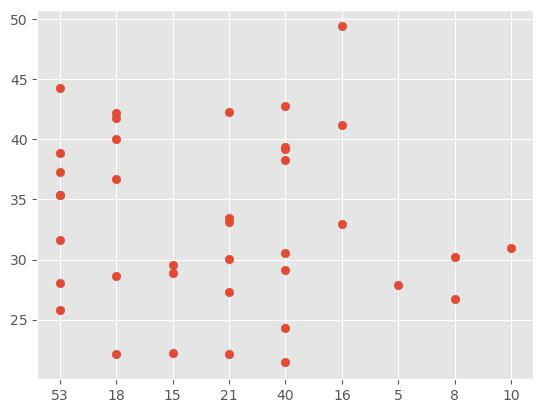

In [51]:
plt.scatter(y_test, predictions)

In [53]:
regressor.score(X_test, y_test)

-0.15342059445609246

In [54]:
from sklearn import metrics 

In [55]:
#Mean Square Error
metrics.mean_squared_error(y_test, predictions)

291.39046596785494

In [56]:
#Model R^2 Value
metrics.r2_score(y_test, predictions)

-0.15342059445609246

In [59]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

AttributeError: 'Series' object has no attribute 'flatten'

In [64]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [177]:
#Model Evaluation
print(regressor.intercept_)

[-0.33760207]


## STOP OLD CODE

In [20]:
#unique values for categorical headers 
#will category encode these 
print(data['What is your age?'].unique())
print(data['Which gender do you identify most with?'].unique())
print(data['What is the highest grade (or year) of regular school you have completed?'].unique())
print(data['Which of the following best describes you?'].unique())
print(data['Which of the following, if any, images are you familiar with?'].unique())
print(data['Which of the following examples, if any, of multi-factor authentication systems have you used?'].unique())

['35-44' '25-34' '18-24' '45-54' '55-64' '65']
['Female' 'Gender Variant/Non-Conforming' 'Male']
['Graduate School' 'High School' 'Prefer Not to Answer' 'College'
 'Elementary School']
['Two or more races' 'White or Caucasian' 'Black or African American'
 'Hispanic or Latino' 'Asian or Pacific Islander' 'Indian']
['SMS text-message, Software Token or Pin Passcode, Biometric (or Fingerprint) 2FA verification, Push Notification'
 'SMS text-message, Software Token or Pin Passcode, Biometric (or Fingerprint) 2FA verification, Push Notification, Hardware Token, Facial Recognition'
 'SMS text-message, Software Token or Pin Passcode, Biometric (or Fingerprint) 2FA verification, Facial Recognition'
 'SMS text-message, Software Token or Pin Passcode, Biometric (or Fingerprint) 2FA verification, Push Notification, Facial Recognition'
 'SMS text-message, Software Token or Pin Passcode, Push Notification, Hardware Token'
 'SMS text-message, Biometric (or Fingerprint) 2FA verification, Push Notific

In [21]:
# Dependent Variable 
y = data.iloc[:, 12:13].astype(str)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [22]:
#Age Encoder

from sklearn.preprocessing import LabelEncoder

age_encoder = LabelEncoder()
age_encoder.fit(data_categorical['What is your age?'])
age_values = age_encoder.transform(data_categorical['What is your age?'])
age_values

NameError: name 'data_categorical' is not defined

In [ ]:
#Gender Encoder

from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
gender_encoder.fit(data_categorical['Which gender do you identify most with?'])
gender_values = gender_encoder.transform(data_categorical['Which gender do you identify most with?'])
gender_values

In [ ]:
#Education Level Encoder

#does education categories really matter? If ranked? I read it is categorical data.
#But I can assign values later.

from sklearn.preprocessing import LabelEncoder

education_encoder = LabelEncoder()
education_encoder.fit(data_categorical['What is the highest grade (or year) of regular school you have completed?'])
education_values = education_encoder.transform(data_categorical['What is the highest grade (or year) of regular school you have completed?'])
education_values

In [ ]:
#Ethnicity Encoder

from sklearn.preprocessing import LabelEncoder

ethnicity_encoder = LabelEncoder()
ethnicity_encoder.fit(data_categorical['Which of the following best describes you?'])
ethnicity_values = ethnicity_encoder.transform(data_categorical['Which of the following best describes you?'])
ethnicity_values

In [ ]:
#Image Familiarity Encoder

from sklearn.preprocessing import LabelEncoder

image_encoder = LabelEncoder()
image_encoder.fit(data_categorical['Which of the following, if any, images are you familiar with?'])
image_values = image_encoder.transform(data_categorical['Which of the following, if any, images are you familiar with?'])
image_values

In [ ]:
#unique values for numeric headers 
# will ordinal encode these 

print(data['Do you believe multi-factor authentication improves security?'].unique())
print(data['How important is online security to you?'].unique())
print(data['How important is quick log in authentication to you?'].unique())
print(data['How important is usability during log in authentication to you?'].unique())
print(data['How important is convenience during log in authentication to you?'].unique())
print(data['How satisfied are you with current log in systems?'].unique())
print(data['How often do you opt to use multi-factor authentication when given the choice?'].unique())

In [ ]:
#Improves Security Encoder

from sklearn.preprocessing import OrdinalEncoder

security_encoder = OrdinalEncoder()
security_encoder.fit(data_numeric[['Do you believe multi-factor authentication improves security?']])
security_values = security_encoder.transform(data_numeric[['Do you believe multi-factor authentication improves security?']])
security_values

In [ ]:
#Online Security Encoder 

from sklearn.preprocessing import OrdinalEncoder

online_encoder = OrdinalEncoder()
online_encoder.fit(data_numeric[['How important is online security to you?']])
online_values = online_encoder.transform(data_numeric[['How important is online security to you?']])
online_values

In [ ]:
#Quick Log In Encoder

from sklearn.preprocessing import OrdinalEncoder

quick_encoder = OrdinalEncoder()
quick_encoder.fit(data_numeric[['How important is quick log in authentication to you?']])
quick_values = quick_encoder.transform(data_numeric[['How important is quick log in authentication to you?']])
quick_values                          

In [ ]:
#Usability Encoder

from sklearn.preprocessing import OrdinalEncoder

usability_encoder = OrdinalEncoder()
usability_encoder.fit(data_numeric[['How important is usability during log in authentication to you?']])
usability_values = usability_encoder.transform(data_numeric[['How important is usability during log in authentication to you?']])
usability_values               

In [ ]:
#Convenience Encoder

from sklearn.preprocessing import OrdinalEncoder

convenience_encoder = OrdinalEncoder()
convenience_encoder.fit(data_numeric[['How important is convenience during log in authentication to you?']])
convenience_values = convenience_encoder.transform(data_numeric[['How important is convenience during log in authentication to you?']])
convenience_values               

In [ ]:
#Current Systems Encoder

from sklearn.preprocessing import OrdinalEncoder

current_encoder = OrdinalEncoder()
current_encoder.fit(data_numeric[['How satisfied are you with current log in systems?']])
current_values = usability_encoder.transform(data_numeric[['How satisfied are you with current log in systems?']])
current_values              

In [ ]:
#Often Encoder

from sklearn.preprocessing import OrdinalEncoder

often_encoder = OrdinalEncoder()
often_encoder.fit(data_numeric[['How often do you opt to use multi-factor authentication when given the choice?']])
often_values = often_encoder.transform(data_numeric[['How often do you opt to use multi-factor authentication when given the choice?']])
often_values  

In [ ]:
#Systems Used Encoder

from sklearn.preprocessing import OrdinalEncoder

sys_used_encoder  = OrdinalEncoder()
sys_used_encoder.fit(data_categorical[['Which of the following examples, if any, of multi-factor authentication systems have you used?']])
sys_values  = sys_used_encoder.transform(data_categorical[['Which of the following examples, if any, of multi-factor authentication systems have you used?']])
sys_values

In [ ]:
# columns to combine: age_values, current_values, convenience_values, usability_values,
# quick_values, online_values, often_values  

# for 'Age Group' column
age = pd.DataFrame(age_values, columns=['Age Group'])

# for 'Gender' column
gender = pd.DataFrame(gender_values, columns=['Gender'])

# for 'Education' column
education = pd.DataFrame(education_values, columns=['Education'])

# for 'Ethnicity' column
ethnicity = pd.DataFrame(ethnicity_values, columns=['Ethnicity'])

# for 'Image Familiarity' column
image_familiarity = pd.DataFrame(image_values, columns=['Image Familiarity'])

# for 'Security Values' column
security_values = pd.DataFrame(security_values, columns=['Security Values'])

# for 'Online Security Importance' column
online_security_importance = pd.DataFrame(online_values, columns=['Online Security Importance'])

# for 'Quick Log In Importance' column
quick_login_importance = pd.DataFrame(quick_values, columns=['Quick Log In Importance'])

# for 'Usability Importance' column
usability_importance = pd.DataFrame(usability_values, columns=['Usability Importance'])

# for 'Convenience Importance' column
convenience_importance = pd.DataFrame(convenience_values, columns=['Convenience Importance'])

# for 'Log In Satisfaction' column
login_satisfaction = pd.DataFrame(current_values, columns=['Log In Satisfaction'])

# for 'MFA Use' column
mfa_use = pd.DataFrame(often_values, columns=['MFA Use'])

# for 'Systems Used' column
sys_used = pd.DataFrame(sys_values, columns=['Systems Used'])

# combine all categorical columns as one dataframe
df_encoded = pd.concat([age, gender, education, ethnicity, image_familiarity, security_values, online_security_importance, quick_login_importance, usability_importance, convenience_importance, login_satisfaction, mfa_use, sys_used], axis=1)

# the preview
print(df_encoded.shape)
df_encoded



In [ ]:
#independent variables
X_input_var = df_encoded.iloc[:,:12].astype(str)

# target variable
y_target = df_encoded.iloc[:,12].astype(str)

# summarize 
print('Input', X_input_var.shape)
print('Output', y_target.shape)

In [ ]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_input_var, y_target, test_size=0.33, random_state=1)

#X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(['Image Familiarity'], axis=1), df_encoded['Image Familiarity'], test_size =0.33, random_state=1)

In [ ]:
# Ordinal encode input variables
ordinal_encoder = OrdinalEncoder(handle_unknown = 'ignore')
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)

In [ ]:
# #Demonstrating feature scaling on a graph

# import pandas as pd
# import numpy as np
# from sklearn import preprocessing
# import matplotlib
# import matplotlib.pyplot as plt
# import seaborn as sns
# matplotlib.style.use('ggplot')
# np.random.seed(1)


# scaler = preprocessing.StandardScaler()
# scaled_df = scaler.fit_transform(df)
# scaled_df = pd.DataFrame(scaled_df, columns=['Age Group', 'Gender', 'Education', 
#                                              'Ethnicity', 'Image Familiarity', 'Security Values',
#                                              'Online Security Importance', 'Quick Log In Importance', 
#                                              'Usability Importance', 'Convenience Importance', 
#                                              'Log In Satisfaction'
# ])


# # fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
# # ax1.set_title('Before feature Scaling')
# # sns.kdeplot(df['Age Group'], ax=ax1)
# # sns.kdeplot(df['Gender'], ax=ax1)
# # sns.kdeplot(df['Education'], ax=ax1)
# # sns.kdeplot(df['Ethnicity'], ax=ax1)
# # sns.kdeplot(df['Image Familiarity'], ax=ax1)
# # sns.kdeplot(df['Security Values'], ax=ax1)
# # sns.kdeplot(df['Online Security Importance'], ax=ax1)
# # sns.kdeplot(df['Quick Log In Importance'], ax=ax1)
# # sns.kdeplot(df['Usability Importance'], ax=ax1)
# # sns.kdeplot(df['Convenience Importance'], ax=ax1)
# # sns.kdeplot(df['Log In Satisfaction'], ax=ax1)
# # ax2.set_title('After feature Scaling')
# # sns.kdeplot(scaled_df['Age Group'], ax=ax2)
# # sns.kdeplot(scaled_df['Gender'], ax=ax2)
# # sns.kdeplot(scaled_df['Education'], ax=ax2)
# # sns.kdeplot(scaled_df['Ethnicity'], ax=ax2)
# # sns.kdeplot(scaled_df['Image Familiarity'], ax=ax2)
# # sns.kdeplot(scaled_df['Security Values'], ax=ax2)
# # sns.kdeplot(scaled_df['Online Security Importance'], ax=ax2)
# # sns.kdeplot(scaled_df['Usability Importance'], ax=ax2)
# # sns.kdeplot(scaled_df['Convenience Importance'], ax=ax2)
# # sns.kdeplot(scaled_df['Log In Satisfaction'], ax=ax2)
# # plt.show()

In [ ]:
#scaled_df

# Creating and Training the LinearRegression Model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)#predicting the test set results"

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:

# df1 = pd.DataFrame({'Actual': y.values.flatten(), 'Predicted': y_pred.flatten()})
# df1 = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
# df1.plot(kind='bar')
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [ ]:
df = ({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df1 = pd.DataFrame.from_dict(df, orient ='index')
df1 = df1.transpose()
df1.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Linear Regression Model Evaluation

In [ ]:
#Model Evaluation
print(regressor.intercept_)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns =['Coefficeint'])
coeff_df

# Predictions From Our Linear Regression Model

In [ ]:
#Making Predictions
predictions = regressor.predict(X_test)
predictions

In [23]:
plt.scatter(y_test, predictions)

NameError: name 'predictions' is not defined

#### In the above scatter plot, we see data is in line with the shape, which means our model has done good predictions

In [ ]:
regressor.score(X_test, y_test)

### Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [ ]:
from sklearn import metrics

In [ ]:
#Mean Squre Error
metrics.mean_squared_error(y_test, predictions)

In [ ]:
#Model R^2 Value
metrics.r2_score(y_test, predictions)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

In [ ]:
#Mean Square Error
metrics.mean_squared_error(y_test, predictions)